In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from astrodust import distlib

MD  = 1.e-5 # g cm^-2
RHO = 2.5   # g cm^-3

# Examples of different grain size distributions in astrodust.distlib

1. A single grain size: **distlib.Grain()**

2. A powerlaw distribution of grains: **distlib.Powerlaw()**

3. Distributions from Weingartner & Draine (2001): **distlib.WD01**

## 1. A single grain size

*distlib.Grain()*

In [3]:
small_grain = distlib.Grain(0.1) # a grain with radius 0.1 micron
big_grain   = distlib.Grain(1.0) # a grain with radius 1.0 micron

In [4]:
print("Using dust mass column %.2e g cm^-2 and rho=%.1f g cm^-3:" % (MD, RHO))
print("Number of small grains = %.2e cm^-2 \n Number of big grains = %.2e cm^-2" % 
      (small_grain.ndens(MD, RHO), big_grain.ndens(MD, RHO)))

Using dust mass column 1.00e-05 g cm^-2 and rho=2.5 g cm^-3:
Number of small grains = 9.55e+08 cm^-2 
 Number of big grains = 9.55e+05 cm^-2


## 2. A powerlaw distribution of grains

*distlib.Powerlaw()*

$$ dn/da \propto a^{-p} $$

between **amin** and **amax**.

In [5]:
MRN1 = distlib.Powerlaw(0.005, 0.3, 3.5)
MRN2 = distlib.Powerlaw(0.005, 0.25, 3.5)
MRN3 = distlib.Powerlaw(0.005, 0.3, 4.0)

(0.003, 0.5)

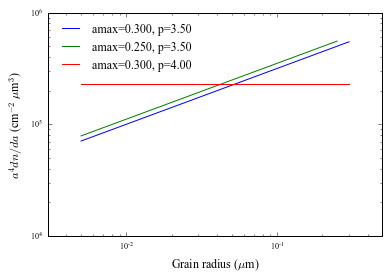

In [6]:
plt.plot(MRN1.a, MRN1.ndens(MD, RHO) * MRN1.a**4, label='amax=%.3f, p=%.2f' % (MRN1.a[-1], MRN1.p))
plt.plot(MRN2.a, MRN2.ndens(MD, RHO) * MRN2.a**4, label='amax=%.3f, p=%.2f' % (MRN2.a[-1], MRN2.p))
plt.plot(MRN3.a, MRN3.ndens(MD, RHO) * MRN3.a**4, label='amax=%.3f, p=%.2f' % (MRN3.a[-1], MRN3.p))

plt.legend(loc='upper left', frameon=False)
plt.loglog()
plt.xlabel('Grain radius ($\mu$m)')
plt.ylabel(r'$a^4 dn/da$ (cm$^{-2}$ $\mu$m$^{3}$)')
plt.xlim(3.e-3,0.5)

## 3. Dust grain size distributions from Weingartner & Draine (2001)

http://adsabs.harvard.edu/abs/2001ApJ...548..296W

*distlib.WD01()*

Input parameters include:
+ *rad* - an array of grain sizes
+ *comp* - a string describing the composition ('Graphite' or 'Silicate')
+ *gal* - Galaxy to use ('MW','LMC', or 'SMC')
+ *R_V* - 3.1, 4.0, or 5.5
+ *bc* - an integer value between 0 and 6
+ *verbose* - if True, prints information about the distribution parameters used

In [7]:
AVALS = np.logspace(np.log10(0.005), np.log10(2.0), 100)

**Some default Milky Way dust grain distributions**

In [8]:
MW_gra = distlib.WD01(comp='Graphite', rad=AVALS, verbose=True)

Using MW model for Graphite from
Weingartner, C. & Draine, B. T. 2001, ApJ, 548, 296
http://adsabs.harvard.edu/abs/2001ApJ...548..296W
rho = 2.240000
('R_V   = ', 3.1000000000000001)
('bc    = ', 0.0)
('alpha = ', -2.25)
('beta  = ', -0.064799999999999996)
('a_t   = ', 0.00745)
('a_c   = ', 0.60599999999999998)
('C     = ', 9.9400000000000001e-11)


In [9]:
MW_sil = distlib.WD01(comp='Silicate', rad=AVALS, verbose=True)

Using MW model for Silicate from
Weingartner, C. & Draine, B. T. 2001, ApJ, 548, 296
http://adsabs.harvard.edu/abs/2001ApJ...548..296W
rho = 3.800000
('R_V   = ', 3.1000000000000001)
('bc    = ', 0.0)
('alpha = ', -1.48)
('beta  = ', -9.3399999999999999)
('a_t   = ', 0.17199999999999999)
('a_c   = ', 0.1)
('C     = ', 1.0200000000000001e-12)


**Milky Way dust with R_V=5.5**

In [10]:
MW_grey_gra = distlib.WD01(comp='Graphite', R_V=5.5, rad=AVALS, verbose=False)
MW_grey_sil = distlib.WD01(comp='Silicate', R_V=5.5, rad=AVALS, verbose=False)

**Some SMC and LMC silicate dust distributions**

In [11]:
SMC_sil = distlib.WD01(gal='SMC', comp='Silicate', rad=AVALS, verbose=True)

Using SMC model for Silicate from
Weingartner, C. & Draine, B. T. 2001, ApJ, 548, 296
http://adsabs.harvard.edu/abs/2001ApJ...548..296W
rho = 3.800000
('R_V   = ', '--')
('bc    = ', 0.0)
('alpha = ', -2.2599999999999998)
('beta  = ', -3.46)
('a_t   = ', 0.216)
('a_c   = ', 0.1)
('C     = ', 3.1599999999999999e-14)


In [12]:
LMC_sil = distlib.WD01(gal='LMC', comp='Silicate', rad=AVALS, verbose=True)

Using LMC model for Silicate from
Weingartner, C. & Draine, B. T. 2001, ApJ, 548, 296
http://adsabs.harvard.edu/abs/2001ApJ...548..296W
rho = 3.800000
('R_V   = ', '--')
('bc    = ', 0.0)
('alpha = ', -2.4500000000000002)
('beta  = ', 0.125)
('a_t   = ', 0.191)
('a_c   = ', 0.1)
('C     = ', 1.8399999999999999e-14)


**Make some comparison plots**

Make a **plot_sizedist** function as a shortcut

In [13]:
def plot_sizedist(ax, dist, md, rho, **kwargs):
    ax.plot(dist.a, dist.ndens(md, rho) * dist.a**4, **kwargs)
    ax.set_xlabel('Grain radius ($\mu$m)')
    ax.set_ylabel(r'$a^4 dn/da$ (cm$^{-2}$ $\mu$m$^{3}$)')
    return

(10.0, 10000000.0)

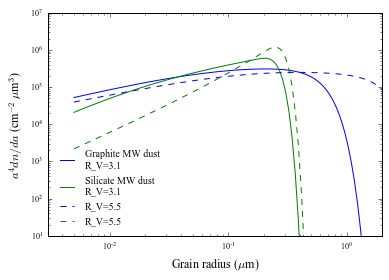

In [14]:
ax = plt.subplot(111)

plot_sizedist(ax, MW_gra, MD, RHO, color='b', label='Graphite MW dust\nR_V=%.1f' % (MW_gra.R_V))
plot_sizedist(ax, MW_sil, MD, RHO, color='g', label='Silicate MW dust\nR_V=%.1f' % (MW_sil.R_V))
plot_sizedist(ax, MW_grey_gra, MD, RHO, color='b', ls='--', label='R_V=%.1f' % (MW_grey_gra.R_V))
plot_sizedist(ax, MW_grey_sil, MD, RHO, color='g', ls='--', label='R_V=%.1f' % (MW_grey_sil.R_V))

plt.legend(loc='lower left', frameon=False, fontsize=10)
plt.loglog()
plt.xlim(3.e-3,2.0)
plt.ylim(10.,1.e7)

(10.0, 10000000.0)

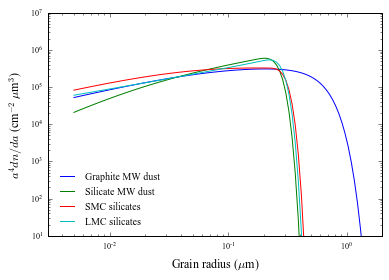

In [15]:
ax = plt.subplot(111)

plot_sizedist(ax, MW_gra, MD, RHO, label='Graphite MW dust')
plot_sizedist(ax, MW_sil, MD, RHO, label='Silicate MW dust')
plot_sizedist(ax, SMC_sil, MD, RHO, label='SMC silicates')
plot_sizedist(ax, LMC_sil, MD, RHO, label='LMC silicates')

plt.legend(loc='lower left', frameon=False, fontsize=10)
plt.loglog()
plt.xlim(3.e-3,2.0)
plt.ylim(10.,1.e7)